In [1]:
import pandas as pd, numpy as np
from csdid.att_gt import ATTgt

In [2]:

import yaml, pandas as pd

with open('../configs/data.yml') as f:
  dt = yaml.safe_load(f)

path_dt = f"../{dt['mpdata']}"
data = pd.read_csv(path_dt)


yname = "lemp"
gname = "first.treat"
idname = "countyreal"
tname = "year"
xformla = f"lemp~1"

In [3]:
b = ATTgt(yname, tname, idname, gname, data = data, xformla=xformla).fit()
# b.plot_attgt()

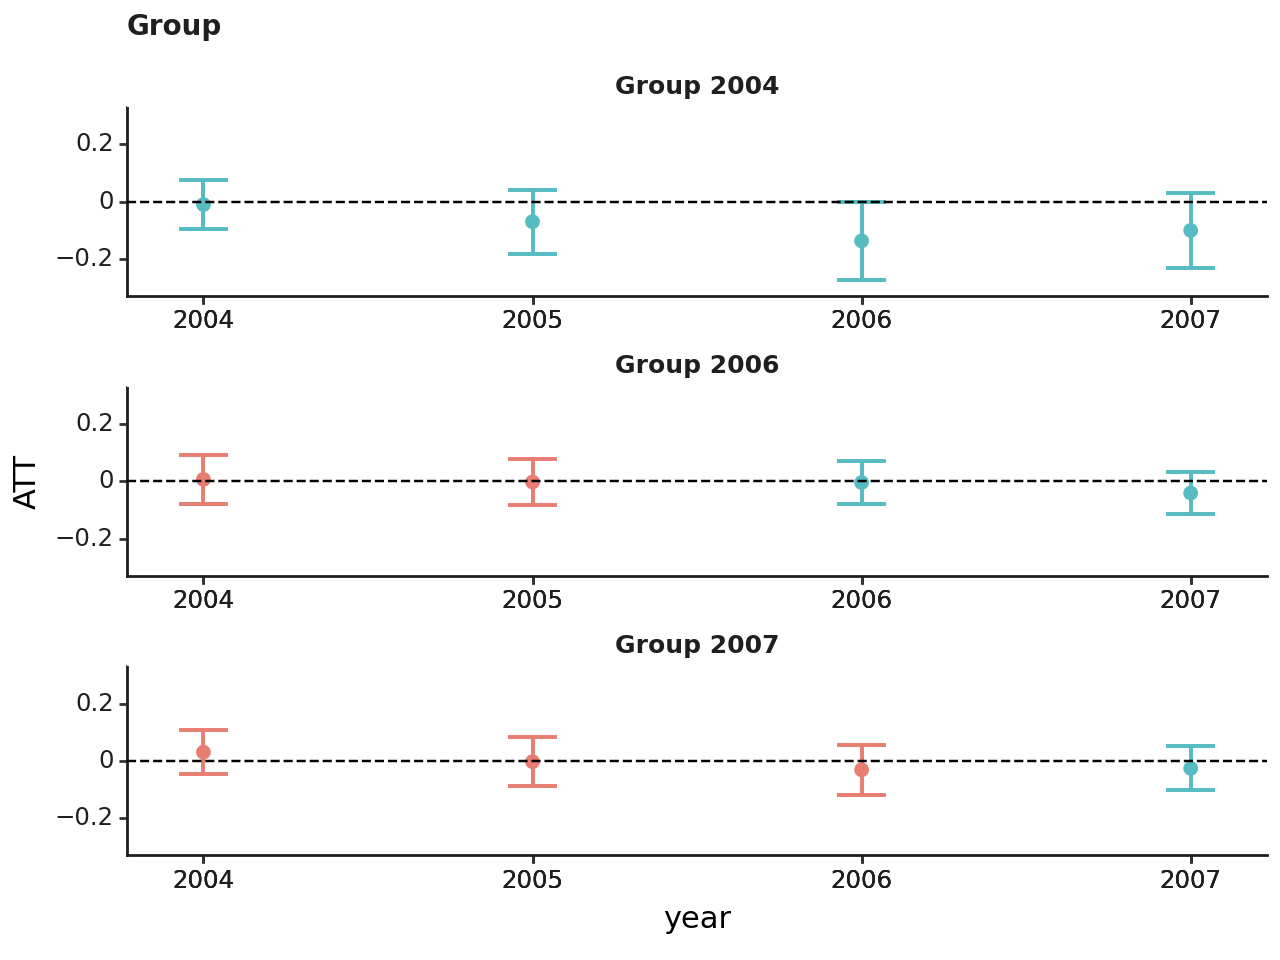

<Figure Size: (640 x 480)>

In [6]:
b.plot_attgt(ylim=(-.3, .3))

In [9]:
from plotnine import ggplot, aes, geom_point, geom_errorbar, scale_y_continuous, scale_x_continuous, \
    scale_color_manual, labs, geom_hline, theme, element_text, element_rect, element_line, \
    scale_x_discrete

from plotnine import ggplot, facet_wrap

# get_ipython().run_line_magic('matplotlib', 'qt') # To aopen separate window
# get_ipython().run_line_magic('matplotlib', 'inline') # In line graph

def gplot(ssresults, ylim=None, xlab=None, ylab=None, title="Group", xgap=1,
           legend=True, ref_line=0, theming=True):
    if ylab is None:
        ylab = 'ATT'
    dabreaks = ssresults['year'][::xgap]
    ssresults['post'] = ssresults['post'].astype('category')

    post_levels = list(ssresults['post'].unique().categories)
    
    if 0 in post_levels:
        color_values = ["#e87d72", "#56bcc2"]
        label_values = ['Pre', 'Post']
    else:
        color_values = ["#56bcc2"]
        label_values = ['Post']
    
    p = ggplot(ssresults,
               aes(x='year', y='att', ymin='att - c * att_se', ymax='att + c * att_se')) + \
        geom_point(aes(colour='post'), size=2) + \
        geom_errorbar(aes(colour='post'), width=0.15 , size=0.8 ) + \
        scale_y_continuous(limits=ylim) + \
        scale_x_continuous(breaks=list(dabreaks), labels=list(map(str, dabreaks))) + \
        scale_color_manual(drop=False, values=color_values, breaks=post_levels, labels=label_values) + \
        labs(x=xlab, y=ylab, title=title, color='') 
        
    if ref_line is not None:
        p += geom_hline(aes(yintercept=ref_line), linetype='dashed')

    if theming:
        p += theme(
                panel_background=element_rect(fill='white'),
                plot_title=element_text(color='#1F1F1F', fontweight='bold', size=10),
                axis_text=element_text(color='#1F1F1F'),
                axis_line=element_line(color='#1F1F1F'),
                strip_background=element_rect(fill='white'),
                legend_position=(.55, -.025),
                strip_text=element_text(color='#1F1F1F', fontweight='bold', size=9)
        ) 

    if not legend:
        p += theme(legend_position='none')

    return p


def splot(ssresults, ylim=None, xlab=None, ylab=None, title="Group",
          legend=True, ref_line=0, theming=True):
    if ylab is None:
        ylab = 'ATT'
    if xlab is None:
        xlab = 'Group'
    ssresults['year'] = ssresults['year'].astype('category')
    ssresults['post'] = ssresults['post'].astype('category')
    
    post_levels = list(ssresults['post'].unique().categories)  
   
    if 0 in post_levels:
        color_values = ["#e87d72", "#56bcc2"]
        label_values = ['Pre', 'Post']
    else:
        color_values = ["#56bcc2"]
        label_values = ['Post']

    p = ggplot(ssresults,
               aes(y='att', x='year', ymin='att - c * att_se', ymax='att + c * att_se')) + \
        geom_point(aes(colour='post'), size=2) + \
        geom_errorbar(aes(colour='post'), width=0.15 , size=0.8) + \
        scale_y_continuous(limits=ylim) + \
        scale_x_discrete(breaks=list(ssresults['year']))  + \
        scale_color_manual(drop=False, values=color_values,breaks=list(post_levels) , labels=label_values) + \
        labs(x=xlab, y=ylab, title=title, color='')
    
    if ref_line is not None:
        p += geom_hline(aes(yintercept=ref_line), linetype='dashed')
    
    if theming:
        p += theme(
                panel_background=element_rect(fill='white'),
                plot_title=element_text(color='#1F1F1F', fontweight='bold', size=10),
                axis_text=element_text(color='#1F1F1F'),
                axis_line=element_line(color='#1F1F1F'),
                strip_background=element_rect(fill='white'),
                legend_position=(.55, -.025)
            )
    
    if not legend:
        p += theme(legend_position='none')
    
    return p

In [10]:
result = b.MP
did_object = b.results
rst = b.results
mp = b.MP
did_object = {
  'group': mp['group'],
  't': mp['t'],
  'att': rst['att'],
  'se': rst['se'],
  'c': rst['c'],
}

In [11]:
grtitle = "Group"

In [12]:
grp = did_object['group']
t_i = did_object['t']

G = len(np.unique(grp))
Y = len(np.unique(t_i))
g = np.unique(grp)[np.argsort(np.unique(grp))].astype(int)
y = np.unique(t_i)

results = pd.DataFrame({'year': np.tile(y, G)})
results['group'] = np.repeat(g, Y)
results['grtitle'] = grtitle + ' ' + results['group'].astype(str)
results['att'] = did_object['att']
results['att_se'] = did_object['se']
results['post'] = np.where(results['year'] >= grp, 1, 0)
results['year'] = results['year']
results['c'] = did_object['c']

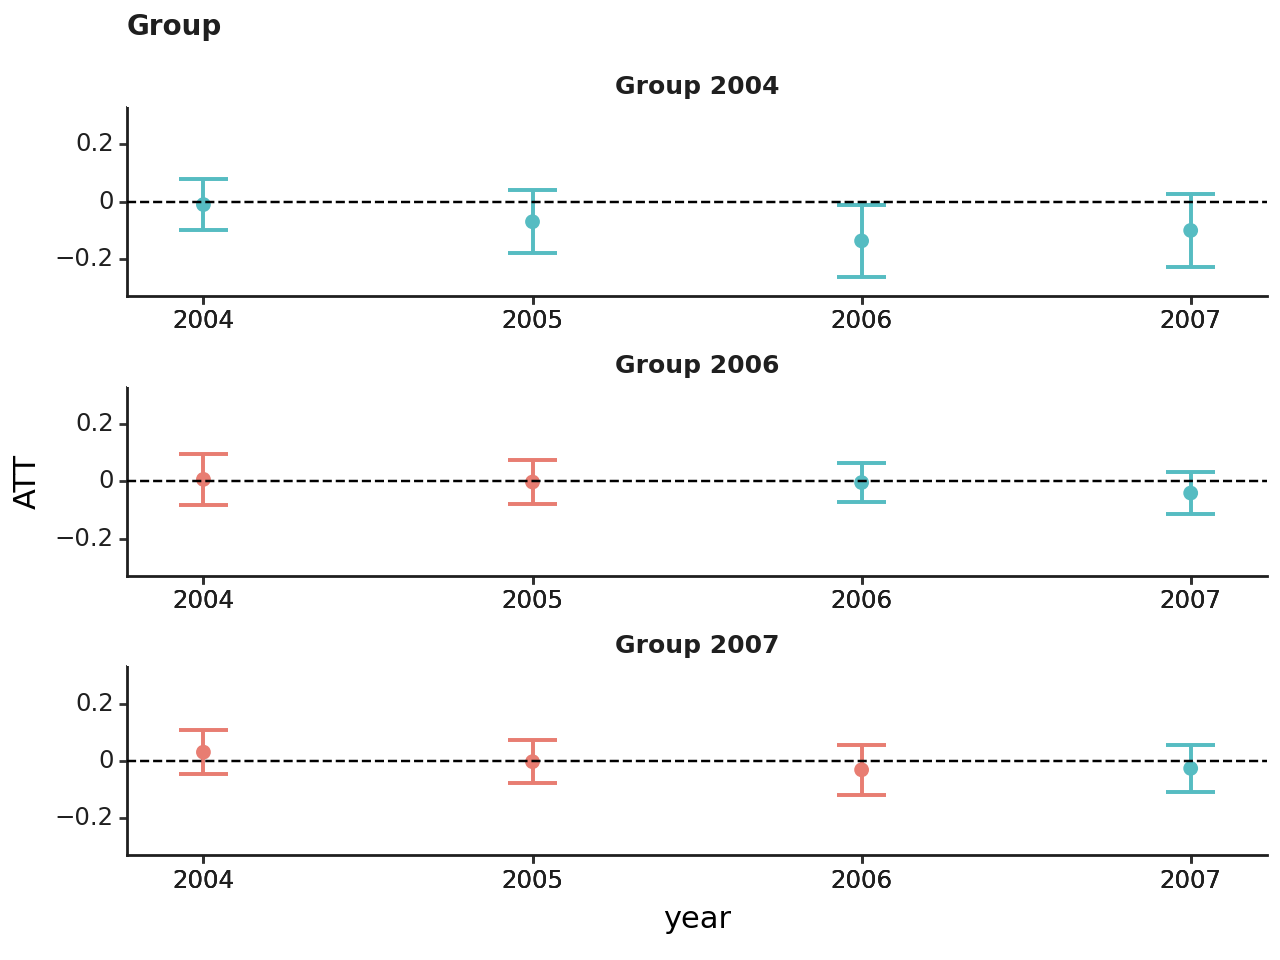

<Figure Size: (640 x 480)>

In [13]:
group = g
gplot(results, (-0.3, 0.3)) + \
                facet_wrap('~ grtitle', ncol=1, scales='free')

In [14]:
group
# results['group'].isin

array([2004, 2006, 2007])